In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [138]:
import seaborn as sns
import matplotlib.pyplot as plt
import ydf
import statistics
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.ensemble import HistGradientBoostingClassifier

In [89]:
df = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')

In [93]:
df[['VIP', 'CryoSleep']] = df[['VIP', 'CryoSleep']].fillna(value=0)
df[["cabin_first", "cabin_second", "cabin_third"]] = (
    df["Cabin"]
    .str.split("/", expand=True)
)

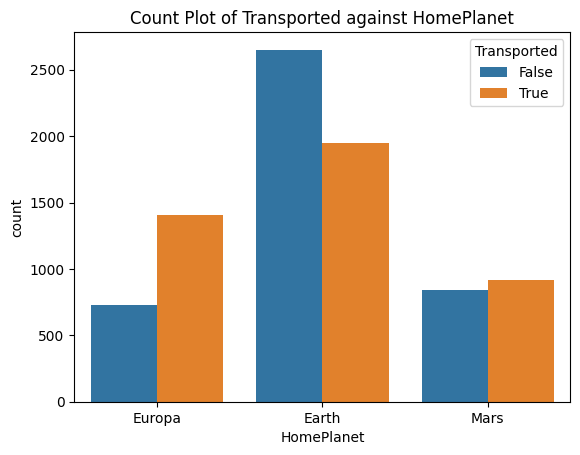

In [91]:
sns.countplot(data=df, x="HomePlanet", hue="Transported")
plt.title("Count Plot of Transported against HomePlanet")
plt.show()
#Can conclude that there is a relationship

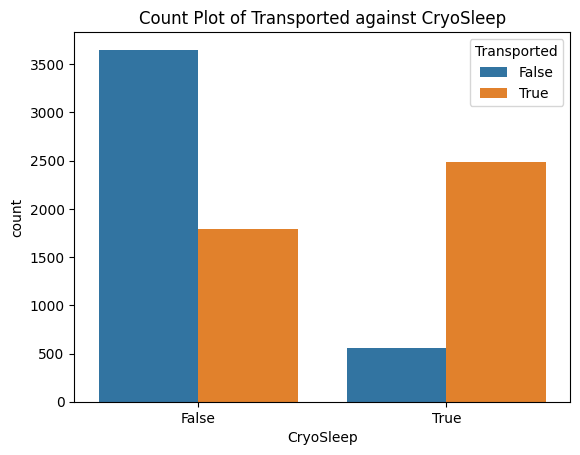

In [10]:
sns.countplot(data=df, x="CryoSleep", hue="Transported")
plt.title("Count Plot of Transported against CryoSleep")
plt.show()
#Can conclude that there is a relationship

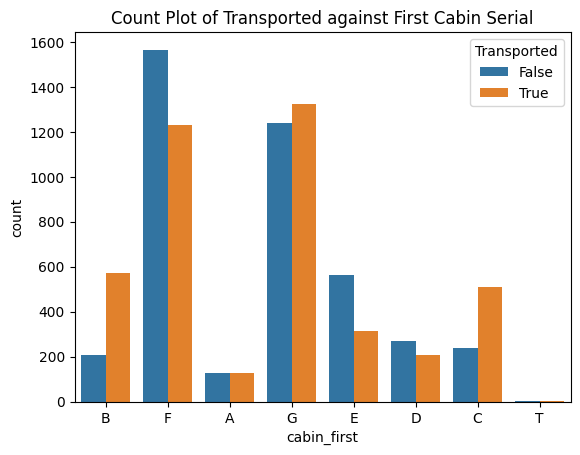

In [21]:
sns.countplot(data=df, x="cabin_first", hue="Transported")
plt.title("Count Plot of Transported against First Cabin Serial")
plt.show()
#Can conclude that there is a relationship

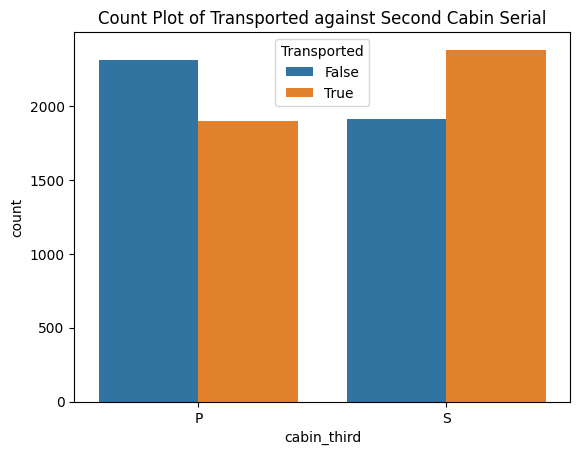

In [23]:
sns.countplot(data=df, x="cabin_third", hue="Transported")
plt.title("Count Plot of Transported against Third Cabin Serial")
plt.show()
#Can conclude that there is a relationship

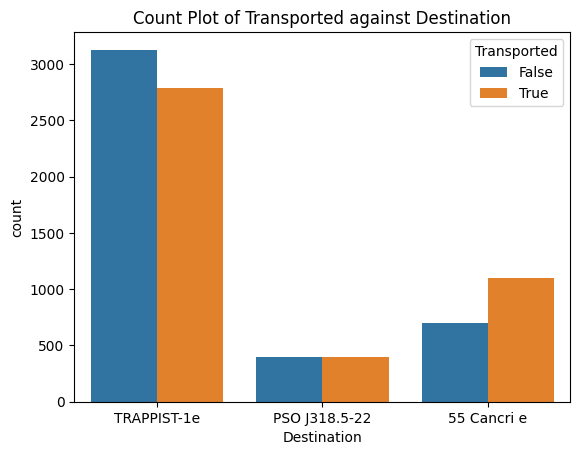

In [24]:
sns.countplot(data=df, x="Destination", hue="Transported")
plt.title("Count Plot of Transported against Destination")
plt.show()
#Can conclude that there is a relationship

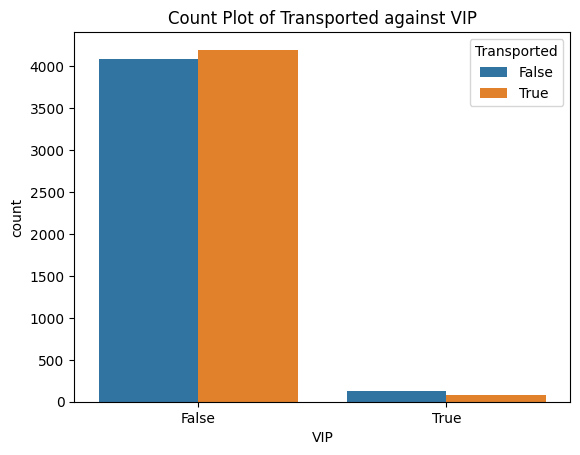

In [25]:
sns.countplot(data=df, x="VIP", hue="Transported")
plt.title("Count Plot of Transported against VIP")
plt.show()
#Can conclude that there is a relationship

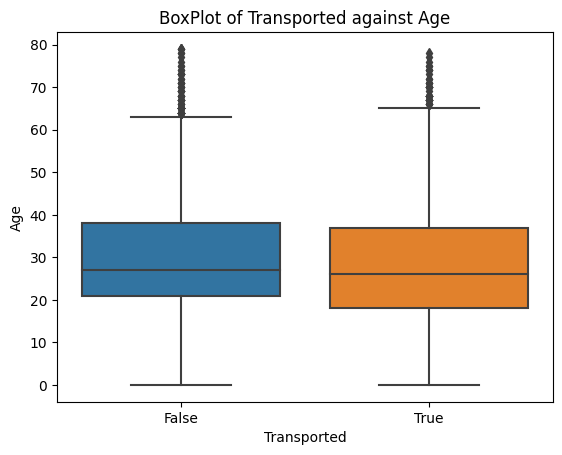

In [26]:
sns.boxplot(data=df, x="Transported", y="Age")
plt.title("BoxPlot of Transported against Age")
plt.show()
#Doesn't seem to have a relationship

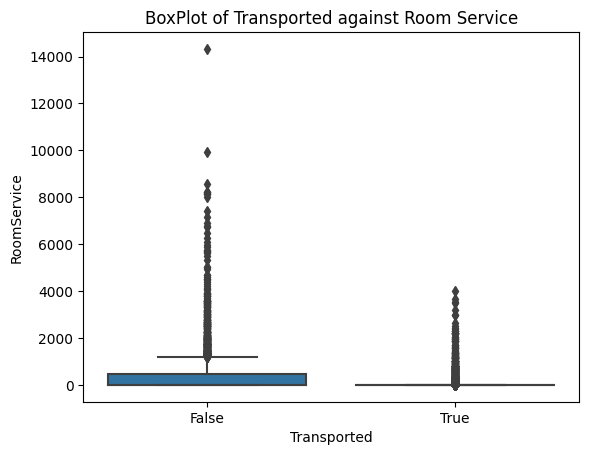

In [28]:
sns.boxplot(data=df, x="Transported", y="RoomService")
plt.title("BoxPlot of Transported against Room Service")
plt.show()
#Somehow seem to have a relationship, but is it related to another explanatory?

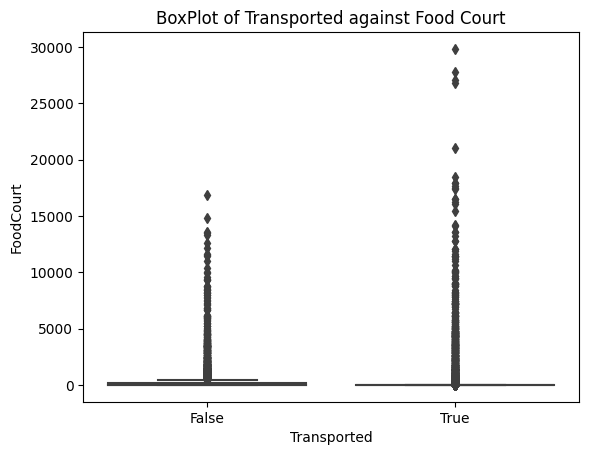

In [29]:
sns.boxplot(data=df, x="Transported", y="FoodCourt")
plt.title("BoxPlot of Transported against Food Court")
plt.show()
#Somehow seem to have a relationship, but is it related to another explanatory?

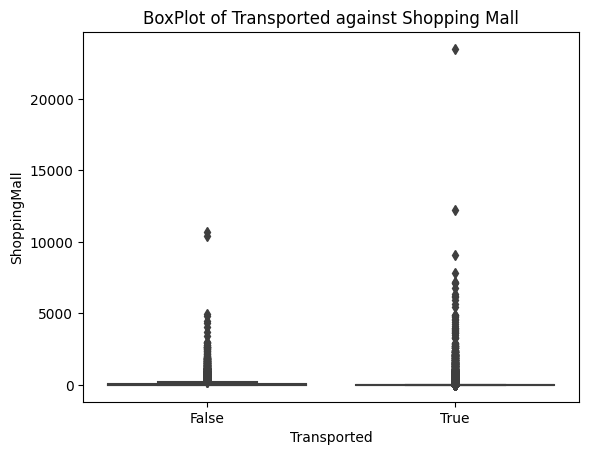

In [30]:
sns.boxplot(data=df, x="Transported", y="ShoppingMall")
plt.title("BoxPlot of Transported against Shopping Mall")
plt.show()
#Somehow seem to have a relationship, but is it related to another explanatory?

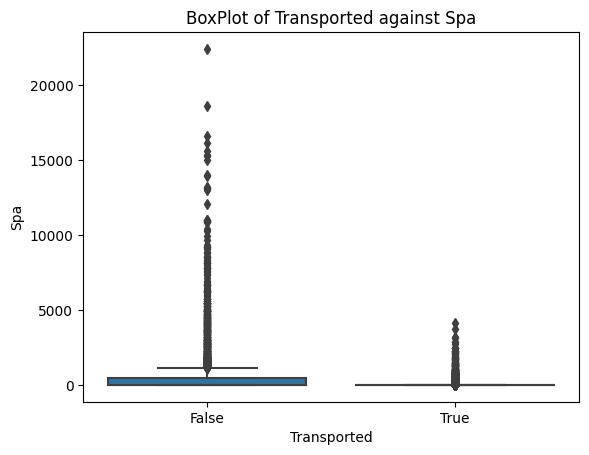

In [31]:
sns.boxplot(data=df, x="Transported", y="Spa")
plt.title("BoxPlot of Transported against Spa")
plt.show()
#Somehow seem to have a relationship, but is it related to another explanatory?

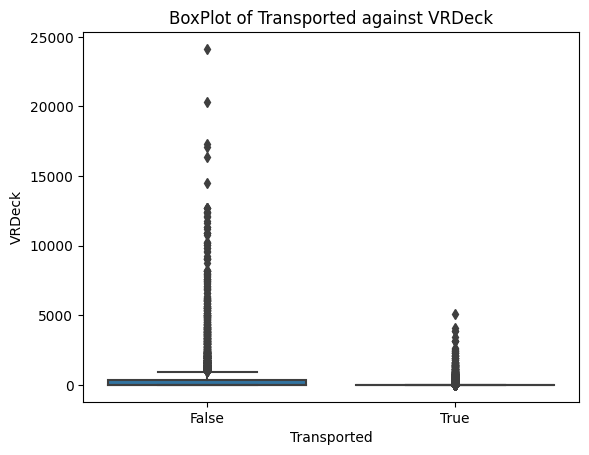

In [32]:
sns.boxplot(data=df, x="Transported", y="VRDeck")
plt.title("BoxPlot of Transported against VRDeck")
plt.show()
#Somehow seem to have a relationship, but is it related to another explanatory?


In [94]:
df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,cabin_first,cabin_second,cabin_third
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


In [67]:
filtered_df = df.drop(["PassengerId", "Cabin", "Name", "cabin_second", "VIP", "Destination", "HomePlanet", "cabin_third"], axis=1)
     

In [83]:
filtered_df[['CryoSleep']] = filtered_df[['CryoSleep']].fillna(value=0)

In [84]:
model = ydf.GradientBoostedTreesLearner(label="Transported").train(filtered_df)
model.describe()

Train model on 8693 examples
Model trained in 0:00:01.379721


In [85]:
pred_train = model.predict(df)
for i in range(len(pred_train)):
    if pred_train[i] >= 0.5:
        pred_train[i] = 1
    else:
        pred_train[i] = 0

y_train_true = df["Transported"].to_numpy()
y_pred_train = np.array(pred_train)

r2_train = r2_score(y_train_true, y_pred_train)
mape_train = mean_absolute_percentage_error(y_train_true, y_pred_train)

print("Training MAPE:", mape_train)
print("Training R²:", r2_train)

Training MAPE: 408240711649367.4
Training R²: 0.3939633382333556


In [86]:
model2 = ydf.RandomForestLearner(label="Transported").train(filtered_df)
model2.describe()

Train model on 8693 examples
Model trained in 0:00:02.253676


In [87]:
pred_train = model2.predict(df)
for i in range(len(pred_train)):
    if pred_train[i] >= 0.5:
        pred_train[i] = 1
    else:
        pred_train[i] = 0

y_train_true = df["Transported"].to_numpy()
y_pred_train = np.array(pred_train)

r2_train = r2_score(y_train_true, y_pred_train)
mape_train = mean_absolute_percentage_error(y_train_true, y_pred_train)

print("Training MAPE:", mape_train)
print("Training R²:", r2_train)

Training MAPE: 352288938986763.75
Training R²: 0.41329024772021905


In [ ]:
#["PassengerId", "Cabin", "Name", "cabin_second", "VIP", "Destination", "HomePlanet", "cabin_third"]

X = df[['CryoSleep', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'cabin_first']]
y = df['Transported']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

cat_cols = ['CryoSleep', 'cabin_first']
binary_encoder = ce.BinaryEncoder(cols=cat_cols)
X_train_cat = binary_encoder.fit_transform(X_train[cat_cols])
X_test_cat = binary_encoder.transform(X_test[cat_cols])  

num_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
X_train_final = pd.concat([X_train[num_cols].reset_index(drop=True), X_train_cat.reset_index(drop=True)], axis=1)
X_test_final = pd.concat([X_test[num_cols].reset_index(drop=True), X_test_cat.reset_index(drop=True)], axis=1)

imputer = SimpleImputer(strategy="most_frequent") 
X_train_clean = imputer.fit_transform(X_train_final)
X_test_clean = imputer.transform(X_test_final)

In [118]:
#Random Forest Algorithm
rf_model = RandomForestClassifier(
    n_estimators=500,
    max_depth=6,
    random_state=42
)

rf_model.fit(X_train_clean, y_train)
rf_pred = rf_model.predict(X_test_clean)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train_final.columns).sort_values(ascending=False)
print(feature_importances)

Random Forest Accuracy: 0.7878090856814262
              precision    recall  f1-score   support

       False       0.80      0.77      0.78       861
        True       0.78      0.81      0.79       878

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739

CryoSleep_1      0.189891
CryoSleep_0      0.164201
Spa              0.135156
RoomService      0.120639
VRDeck           0.112274
FoodCourt        0.087316
ShoppingMall     0.058132
Age              0.044797
cabin_first_3    0.044169
cabin_first_2    0.029569
cabin_first_1    0.011776
cabin_first_0    0.002080
dtype: float64


In [139]:
#Gradient Boosted Algorithm
gb_model = GradientBoostingClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)
#lr 0.1 Acc = 0.78
#lr 0.05 Acc = 0.784
#max_depth 7 Acc = 0.781
#max_depth 5 Acc = 0.791 (Use this)
#n_estimators 400/600 Acc = 0.787

gb_model.fit(X_train_clean, y_train)
gb_pred = gb_model.predict(X_test_clean)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))
print(classification_report(y_test, gb_pred))
feature_importances = pd.Series(gb_model.feature_importances_, index=X_train_final.columns).sort_values(ascending=False)
print(feature_importances)

TypeError: HistGradientBoostingClassifier.__init__() got an unexpected keyword argument 'n_estimators'

In [146]:
#Full rf_model
X = df[['CryoSleep', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'cabin_first']]
y = df['Transported']

cat_cols = ['CryoSleep', 'cabin_first']
binary_encoder = ce.BinaryEncoder(cols=cat_cols)
X_cat = binary_encoder.fit_transform(X[cat_cols])


num_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
X_train_final = pd.concat([X[num_cols].reset_index(drop=True), X_cat.reset_index(drop=True)], axis=1)

imputer = SimpleImputer(strategy="most_frequent") 
X_train_clean = imputer.fit_transform(X_train_final)

rf_model = RandomForestClassifier(
    n_estimators=500,
    max_depth=6,
    random_state=42
)

rf_model.fit(X_train_clean, y)

RandomForestClassifier(max_depth=6, n_estimators=500, random_state=42)

In [149]:
#Full gb_model
X = df[['CryoSleep', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'cabin_first']]
y = df['Transported']

cat_cols = ['CryoSleep', 'cabin_first']
binary_encoder = ce.BinaryEncoder(cols=cat_cols)
X_cat = binary_encoder.fit_transform(X[cat_cols])


num_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
X_train_final = pd.concat([X[num_cols].reset_index(drop=True), X_cat.reset_index(drop=True)], axis=1)

imputer = SimpleImputer(strategy="most_frequent") 
X_train_clean = imputer.fit_transform(X_train_final)

gb_model = GradientBoostingClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)

gb_model.fit(X_train_clean, y)

GradientBoostingClassifier(learning_rate=0.05, max_depth=5, n_estimators=500,
                           random_state=42)

In [152]:
# Load the test dataset
test_df = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
submission_id = test_df.PassengerId
test_df[['VIP', 'CryoSleep']] = test_df[['VIP', 'CryoSleep']].fillna(value=0)
test_df[["cabin_first", "cabin_second", "cabin_third"]] = (
    test_df["Cabin"]
    .str.split("/", expand=True)
)

X = test_df[['CryoSleep', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'cabin_first']]

cat_cols = ['CryoSleep', 'cabin_first']
X_cat = binary_encoder.transform(X[cat_cols])

num_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
X_test_final = pd.concat([X[num_cols].reset_index(drop=True), X_cat.reset_index(drop=True)], axis=1)
X_test_clean = imputer.transform(X_test_final)

pred_test = gb_model.predict(X_test_clean)
pred_test = (pred_test >= 0.5).astype(bool)
        
output = pd.DataFrame({'PassengerId': submission_id,
                       'Transported': pred_test})

output.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [153]:
sample_submission_df = pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv')
sample_submission_df['Transported'] = pred_test
sample_submission_df.to_csv('/kaggle/working/submission.csv', index=False)
sample_submission_df.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
